In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the Data

In [2]:
dfraw = pd.read_csv('../data/fall_2019_total_participant_data.csv')

In [3]:
dfraw

,ParticipantName,RecordingName,RecordingDate,FixationFilter,MediaName,RecordingTimestamp,FixationIndex,GazeEventType,GazeEventDuration,GazePointX (ADCSpx),...,EyePosRightY (ADCSmm),EyePosRightZ (ADCSmm),ValidityLeft,ValidityRight,PupilLeft,PupilRight,SaccadeIndex,IRMarkerCount,IRMarkerID,PupilGlassesRight
0,P01,Rec 01,11/4/2019,I-VT filter,NaN,12.0,NaN,Unclassified,8.0,645.0,...,130.35,591.33,0.0,0.0,5.49,5.38,NaN,NaN,NaN,NaN
1,P01,Rec 01,11/4/2019,I-VT filter,NaN,29.0,1.0,Fixation,733.0,644.0,...,130.36,591.30,0.0,0.0,5.49,5.38,NaN,NaN,NaN,NaN
2,P01,Rec 01,11/4/2019,I-VT filter,NaN,46.0,1.0,Fixation,733.0,644.0,...,130.34,591.16,0.0,0.0,5.48,5.39,NaN,NaN,NaN,NaN
3,P01,Rec 01,11/4/2019,I-VT filter,NaN,62.0,1.0,Fixation,733.0,646.0,...,130.32,591.12,0.0,0.0,5.49,5.38,NaN,NaN,NaN,NaN
4,P01,Rec 01,11/4/2019,I-VT filter,NaN,79.0,1.0,Fixation,733.0,645.0,...,130.33,591.22,0.0,0.0,5.47,5.38,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888472,P29,Rec 01,12/6/2019,I-VT filter,NaN,730993.0,NaN,Saccade,50.0,907.0,...,152.90,642.30,0.0,0.0,4.33,3.97,2294.0,NaN,NaN,NaN
1888473,P29,Rec 01,12/6/2019,I-VT filter,NaN,731010.0,NaN,Saccade,50.0,1132.0,...,153.07,642.97,0.0,0.0,4.30,3.97,2294.0,NaN,NaN,NaN
1888474,P29,Rec 01,12/6/2019,I-VT filter,NaN,731026.0,NaN,Unclassified,25.0,1155.0,...,152.96,642.69,0.0,0.0,4.37,4.00,NaN,NaN,NaN,NaN
1888475,P29,Rec 01,12/6/2019,I-VT filter,NaN,731043.0,NaN,Unclassified,25.0,1150.0,...,152.94,642.71,0.0,0.0,4.35,4.00,NaN,NaN,NaN,NaN


In [4]:
dfraw.columns

Index(['ParticipantName', 'RecordingName', 'RecordingDate', 'FixationFilter',
       'MediaName', 'RecordingTimestamp', 'FixationIndex', 'GazeEventType',
       'GazeEventDuration', 'GazePointX (ADCSpx)', 'GazePointY (ADCSpx)',
       'GazePointLeftX (ADCSpx)', 'GazePointLeftY (ADCSpx)',
       'GazePointRightX (ADCSpx)', 'GazePointRightY (ADCSpx)',
       'FixationPointX (MCSpx)', 'FixationPointY (MCSpx)',
       'GazePointX (MCSpx)', 'GazePointY (MCSpx)', 'CamLeftX', 'CamLeftY',
       'CamRightX', 'CamRightY', 'DistanceLeft', 'DistanceRight',
       'EyePosLeftX (ADCSmm)', 'EyePosLeftY (ADCSmm)', 'EyePosLeftZ (ADCSmm)',
       'EyePosRightX (ADCSmm)', 'EyePosRightY (ADCSmm)',
       'EyePosRightZ (ADCSmm)', 'ValidityLeft', 'ValidityRight', 'PupilLeft',
       'PupilRight', 'SaccadeIndex', 'IRMarkerCount', 'IRMarkerID',
       'PupilGlassesRight'],
      dtype='object')

In [5]:
# Make sure that MCSpx and ADCSpx have the same coordinates
print((dfraw['GazePointX (MCSpx)'] - dfraw['GazePointX (ADCSpx)']).unique())
print((dfraw['GazePointY (MCSpx)'] - dfraw['GazePointY (ADCSpx)']).unique(), 'uh oh')

[nan  0.]
[  nan    0. -152.] uh oh


In [6]:
# There's differences in the y part for some of the black screen, not sure why 
print(dfraw.loc[(dfraw['GazePointY (MCSpx)'] - dfraw['GazePointY (ADCSpx)']) < 0].shape[0])
print(dfraw.loc[(dfraw['GazePointY (MCSpx)'] - dfraw['GazePointY (ADCSpx)']) < 0].MediaName.unique())
print(dfraw.loc[dfraw.MediaName == 'Black Screen.jpg'].shape[0])
print('{:.1%} of the black screen has this -152 issue...'.format(29805 / 84323))

29805
['Black Screen.jpg']
84323
35.3% of the black screen has this -152 issue...


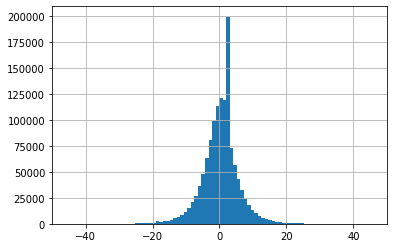

In [7]:
# Fixation point differs because gaze bounces around fixation
(dfraw['FixationPointX (MCSpx)'] - dfraw['GazePointX (ADCSpx)']).hist(bins=1_000)
plt.xlim(-50, 50);

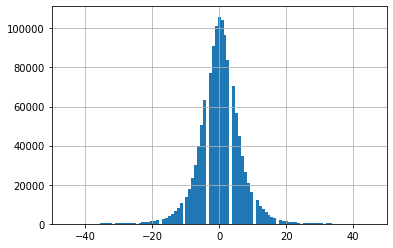

In [8]:
# Fixation point differs because gaze bounces around fixation
(dfraw['FixationPointY (MCSpx)'] - dfraw['GazePointY (ADCSpx)']).hist(bins=1_000)
plt.xlim(-50, 50);

## Clean up data

#### Participant Naming Mistakes

In [9]:
# Fix the mistakes in the ParticipantName column
def fix_participant_names(entry):
    if entry == 'P09':
        return 'P08'
    elif entry == 'P9':
        return 'P09'
    else:
        return entry

dfraw.ParticipantName = dfraw.ParticipantName.map(fix_participant_names)

#### Poor Calibrations

In [10]:
# Drop all entries from the participants whose eyes could not be identified 
# well by the eye trackier (particpants 16 and 19) in `par_data_total.ipynb
poor_calibrations = ['P16', 'P19']
dfraw = dfraw[~dfraw.ParticipantName.isin(poor_calibrations)]

#### Invalid Trials

In [11]:
# We get these manual removes from looking at the histograms of the fixation data and the 
# recording_data in `par_data_total.ipynb`

manual_remove = ['EATCJK', 'EUKMPA', 'GNSOAL', 'MLRNAO', 'YSMOTR', 'TENUAP', 
                 'UMKPAE', 'RWBON', 'WRNOB', 'NPTAUE', 'RSOYMT', 'LOMNAR']    

dfraw = dfraw.loc[~dfraw.MediaName.isin(['anagram_' + agrm + '.tiff' for agrm in manual_remove])]

#### Lazy Eye

In [12]:
# Handle participant 12's lazy right eye
dfraw['GazePointX (ADCSpx)'] = np.where(dfraw.ParticipantName == 'P12', 
                            dfraw['GazePointLeftX (ADCSpx)'], dfraw['GazePointX (ADCSpx)'])

dfraw['GazePointY (ADCSpx)'] = np.where(dfraw.ParticipantName == 'P12', 
                            dfraw['GazePointLeftY (ADCSpx)'], dfraw['GazePointY (ADCSpx)'])

#### Get 5 and 6 Number Calibrations

In [13]:
max_timestamps = dict(dfraw.groupby(['ParticipantName']).RecordingTimestamp.max())

limited_recording_data = dfraw[['ParticipantName', 'RecordingTimestamp']]

def get_percent_recording(row):
    max_timestamp =  max_timestamps.get(row['ParticipantName'], np.nan)
    return row['RecordingTimestamp'] / max_timestamp

In [14]:
%%time
percent_recording = limited_recording_data.apply(get_percent_recording, axis=1)

CPU times: user 35.6 s, sys: 158 ms, total: 35.8 s
Wall time: 35.9 s


In [15]:
dfraw['PercentRecording'] = percent_recording

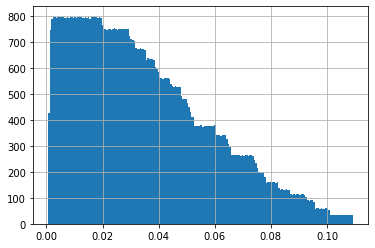

In [16]:
# When did the 5 number calibrations happen for each participant?
# Answer: Beginning
dfraw.loc[(dfraw.MediaName == '5_anagram_12345.tiff')]['PercentRecording'].hist(bins=200)

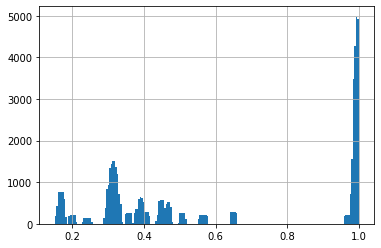

In [17]:
# When did the 6 number calibrations happen for each participant?
# Answer: Middle and End
dfraw.loc[(dfraw.MediaName == '6_anagram_123456.tiff')]['PercentRecording'].hist(bins=200)

In [18]:
# After 75% through the trial is a safe cut off to get the ending 6 calibration
dfraw.loc[(dfraw.MediaName == '6_anagram_123456.tiff') &
          (dfraw['PercentRecording'] > 0.72)].sort_values(
    by='PercentRecording')['PercentRecording'].head()

1842525    0.957354
1842526    0.957374
1842527    0.957395
1842528    0.957415
1842529    0.957436
Name: PercentRecording, dtype: float64

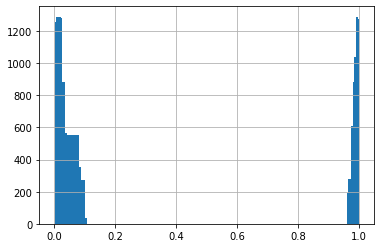

In [19]:
dfraw.loc[(dfraw.MediaName == 'anagram_123456.tiff')]['PercentRecording'].hist(bins=200)

In [20]:
dfraw.MediaName = np.where((dfraw.PercentRecording > 0.72) & (dfraw.MediaName == 'anagram_123456.tiff'), 
        '6_anagram_123456_2.tiff', dfraw.MediaName)
dfraw.MediaName = np.where((dfraw.PercentRecording <= 0.72) & (dfraw.MediaName == 'anagram_123456.tiff'), 
        '6_anagram_123456_1.tiff', dfraw.MediaName)
dfraw.MediaName = np.where((dfraw.PercentRecording > 0.72) & (dfraw.MediaName == '6_anagram_123456.tiff'), 
        '6_anagram_123456_2.tiff', dfraw.MediaName)
dfraw.MediaName = np.where((dfraw.PercentRecording <= 0.72) & (dfraw.MediaName == '6_anagram_123456.tiff'), 
        '6_anagram_123456_1.tiff', dfraw.MediaName)

#### Saccade and Fixation index count across the whole recording (participant in our case)

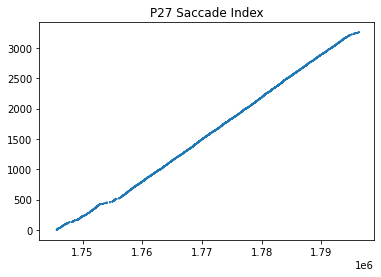

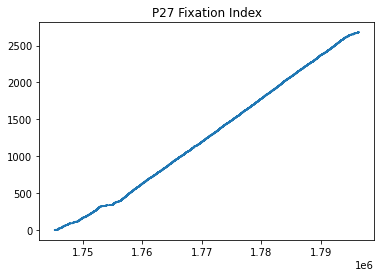

In [21]:
par = np.random.choice(dfraw.ParticipantName.unique())
dfraw.loc[dfraw.ParticipantName == par]['SaccadeIndex'].plot(title=par + ' Saccade Index')
plt.show()
dfraw.loc[dfraw.ParticipantName == par]['FixationIndex'].plot(title=par + ' Fixation Index')
plt.show()

#### Understand what columns to keep, and what columns to drop

In [22]:
for col in dfraw.columns:
    print(col, dfraw[col].unique()[:20], sep='\n')
    print('\n')

ParticipantName
['P01' 'P02' 'P03' 'P04' 'P05' 'P06' 'P07' 'P08' 'P09' 'P10' 'P11' 'P12'
 'P13' 'P14' 'P15' 'P22' nan 'P17' 'P18' 'P20']


RecordingName
['Rec 01' 'Participant_2' 'Rec 03' 'Rec01' nan]


RecordingDate
['11/4/2019' '11/5/2019' '11/11/2019' '11/12/2019' '11/13/2019'
 '11/18/2019' '11/20/2019' '11/21/2019' '12/2/2019' nan '11/22/2019'
 '11/25/2019' '12/3/2019' '12/4/2019' '12/5/2019' '12/6/2019']


FixationFilter
['I-VT filter' nan]


MediaName
[nan '6_anagram_123456_1.tiff' 'anagram_LEADFW.tiff' 'anagram_SCODLE.tiff'
 'anagram_ARDIEM.tiff' 'anagram_IUJONR.tiff' 'anagram_RYEABT.tiff'
 'anagram_PNEUTA.tiff' 'anagram_MDTOSE.tiff' 'anagram_KUMEPA.tiff'
 'anagram_ASONLG.tiff' 'anagram_OYSMTR.tiff' 'anagram_LMOARN.tiff'
 'anagram_AETCJK.tiff' '6_anagram_123456_2.tiff' 'anagram_AFDWLE.tiff'
 'anagram_CEOLDS.tiff' 'anagram_IAMEDR.tiff' 'anagram_NOJUIR.tiff'
 'anagram_ETABYR.tiff']


RecordingTimestamp
[ 12.  29.  46.  62.  79.  96. 112. 129. 145. 162. 179. 195. 212. 229.
 245. 26

#### Drop Select Columns

In [23]:
uninteresting_cols = ['RecordingName', 'FixationFilter', 'GazePointLeftX (ADCSpx)', 
                      'GazePointLeftY (ADCSpx)', 'GazePointRightX (ADCSpx)', 
                      'GazePointRightY (ADCSpx)', 'PercentRecording']

redundant_cols = ['GazePointX (ADCSpx)', 'GazePointY (ADCSpx)']

empty_cols = ['CamLeftX', 'CamLeftY', 'CamRightX', 'CamRightY', 'IRMarkerCount', 
              'IRMarkerID', 'PupilGlassesRight']

In [24]:
dfraw = dfraw.drop(uninteresting_cols + redundant_cols + empty_cols, axis=1)

#### Drop rows with with only 'NaN' entries

In [25]:
print(dfraw.shape[0])
dfraw = dfraw.dropna(how='all')
print(dfraw.shape[0])

1709819
1709817


### Export cleaned data

In [26]:
dfclean = dfraw.copy()

In [ ]:
dfclean.to_csv('../data/fall_2019_cleaned_total_participant_data.csv')